# Guidelines
This activity is similar to the previous activity but now you are given a microcanonical ensemble of an ideal gas. This means that the gas is isolated and is not allowed to exchange heat/energy with the environment. Go through the notebook and reapeat the same steps you did for the previous activity to see how that makes a difference.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import random
import pandas as pd

## Run the following two cells to load the list positions of the particles and the list of the momenutm of each particle.

In [2]:
momentum_list = np.loadtxt("https://raw.githubusercontent.com/MoGaber/Statistical-Mechanics-Data/main/gas_states.csv",  delimiter=",").reshape(1001, 500, 2)

In [3]:
positions_list =  gas_states = np.loadtxt("https://raw.githubusercontent.com/MoGaber/Statistical-Mechanics-Data/main/gas_positions.csv",  delimiter=",").reshape(1001, 500, 2)

## Now, go ahead and try to find the most likely and least likely states using the same approach you used for the previous activity. Write down any interesting things you notice.

### Hints: 

The hamiltonain for each particle of the ideal gas is given by (px^2+py^2)/2m where px is the momentum component in the x-direction and py is the momentum component in the y-direction. m is the mass

Matom = 4E-3/6E23 -> mass in kg

k = 1.4E-23 -> Boltzmann constant

T=300 -> temp in Kelvin

# Solution

In [4]:
Matom = 4E-3/6E23 # helium mass in kg
energy_list = []
for time_step in momentum_list:
  energy = 0
  for point in time_step:
    energy+= (point[0]**2 + point[1]**2) / 2*Matom 
  energy_list.append(energy)

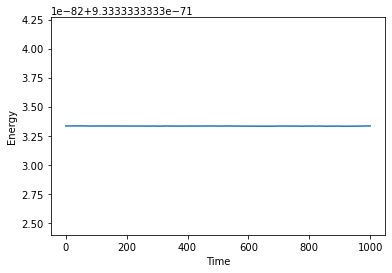

In [5]:
plt.plot([i for i in range( len(energy_list))], energy_list)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()

In [6]:
T = 300
kB = 1.4E-23 
partition_normalization = sum([np.exp(-i/ (T*kB) ) for i in energy_list])

In [7]:
(np.exp(-min(energy_list)/ (T*kB))) / partition_normalization

0.000999000999000999

In [8]:
(np.exp(-max(energy_list)/ (T*kB))) / partition_normalization

0.000999000999000999

## Run the following cell to see the first state and the last state of the ensemble. What do you notice?

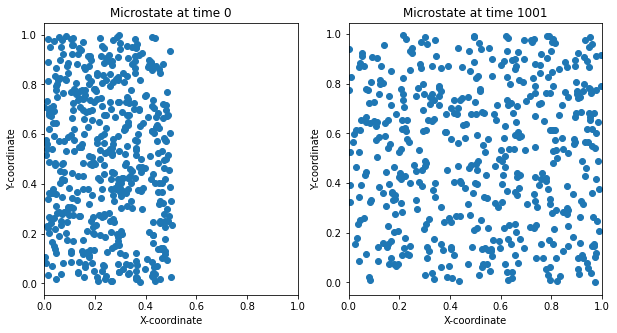

In [9]:
plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(positions_list[0][:, 0], positions_list[0][:, 1])
plt.xlim(0, 1)
plt.title(f"Microstate at time 0")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")


plt.subplot(1, 2, 2)
plt.scatter(positions_list[-1][:, 0], positions_list[-1][:, 1])
plt.xlim(0, 1)
plt.title(f"Microstate at time {len(positions_list)}")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()